# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Histogram

Text(0.5, 1.0, 'Histogram with 8 bins')

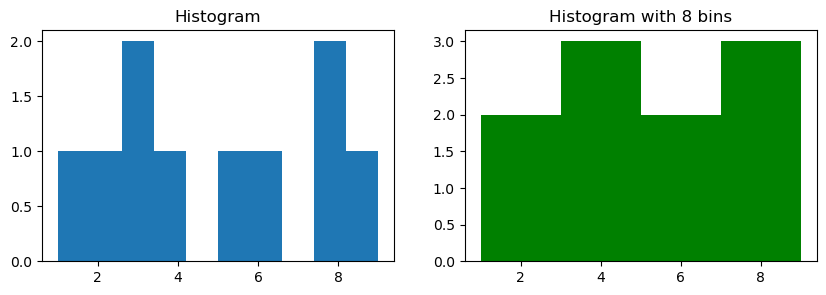

In [6]:
numbers_list = np.array([3,2,3,5,1,9,8,8,4,6])

plt.figure(figsize=[10,3])
plt.subplot(121);plt.hist(numbers_list);plt.title('Histogram')
plt.subplot(122);plt.hist(numbers_list,4,color='green');plt.title('Histogram with 8 bins')

### Histogram of a photo

Text(0.5, 1.0, 'Step Histogram')

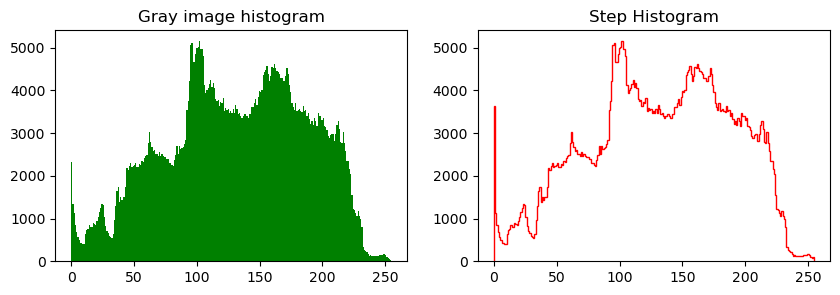

In [9]:
img = cv2.imread('images/bird.jpg',0)
if img is None:
    print('Error')
    
plt.figure(figsize=[10,3])
plt.subplot(121);plt.hist(img.ravel(),256, color = 'green');plt.title('Gray image histogram')
plt.subplot(122);plt.hist(img.ravel(),256,color = 'red',histtype='step');plt.title('Step Histogram')

### Histogram by cv2
## cv2.calcHist(images, channels, mask, bins, range)

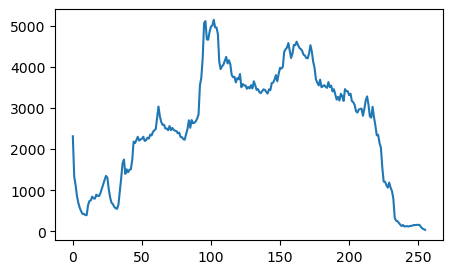

In [12]:
img = cv2.imread('images/bird.jpg',0)
if img is None:
    print('Error')
hist = cv2.calcHist([img],[0], None,[256], [0,256])
plt.figure(figsize=[5,3])
plt.plot(hist)

### real images

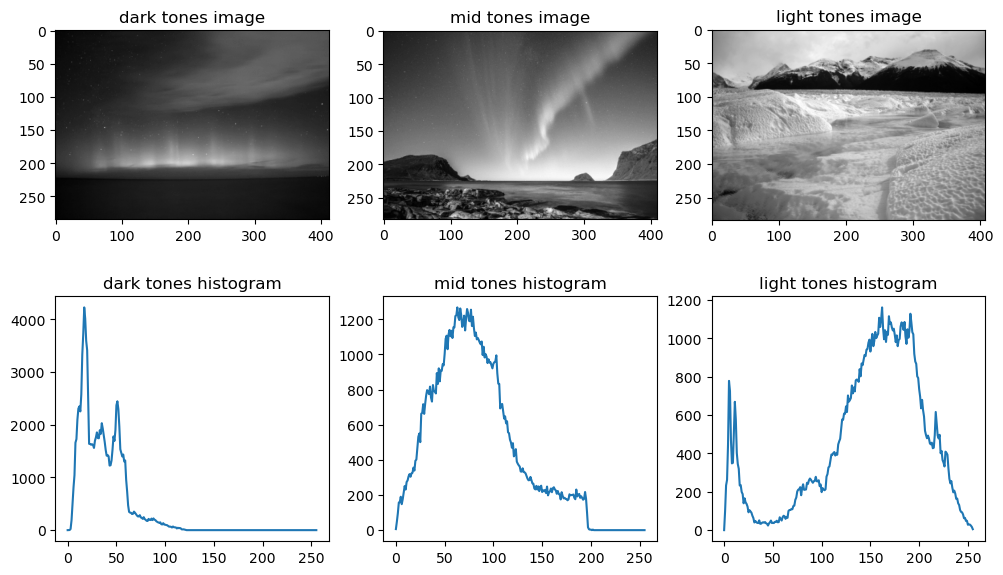

In [13]:
# read images
dark_tones = cv2.imread('images/dark.png')
mid_tones = cv2.imread('images/mid.png')
light_tones = cv2.imread('images/light.png')

#convert to gray
dark_tones_gray = cv2.cvtColor(dark_tones, cv2.COLOR_BGR2GRAY)
mid_tones_gray = cv2.cvtColor(mid_tones, cv2.COLOR_BGR2GRAY)
light_tones_gray = cv2.cvtColor(light_tones, cv2.COLOR_BGR2GRAY)

#calculate histograms
dark_tones_histogram = cv2.calcHist([dark_tones_gray], [0], None, [256], [0, 256])
mid_tones_histogram = cv2.calcHist([mid_tones_gray], [0], None, [256], [0, 256])
light_tones_histogram = cv2.calcHist([light_tones_gray], [0], None, [256], [0, 256])

#plot
plt.figure(figsize=[12,7])
plt.subplot(231);plt.imshow(dark_tones_gray, cmap='gray');plt.title("dark tones image");
plt.subplot(232);plt.imshow(mid_tones_gray, cmap='gray');plt.title("mid tones image");
plt.subplot(233);plt.imshow(light_tones_gray, cmap='gray');plt.title("light tones image");
plt.subplot(234);plt.plot(dark_tones_histogram);plt.title("dark tones histogram");
plt.subplot(235);plt.plot(mid_tones_histogram);plt.title("mid tones histogram");
plt.subplot(236);plt.plot(light_tones_histogram);plt.title("light tones histogram");

### Histogram for each channel

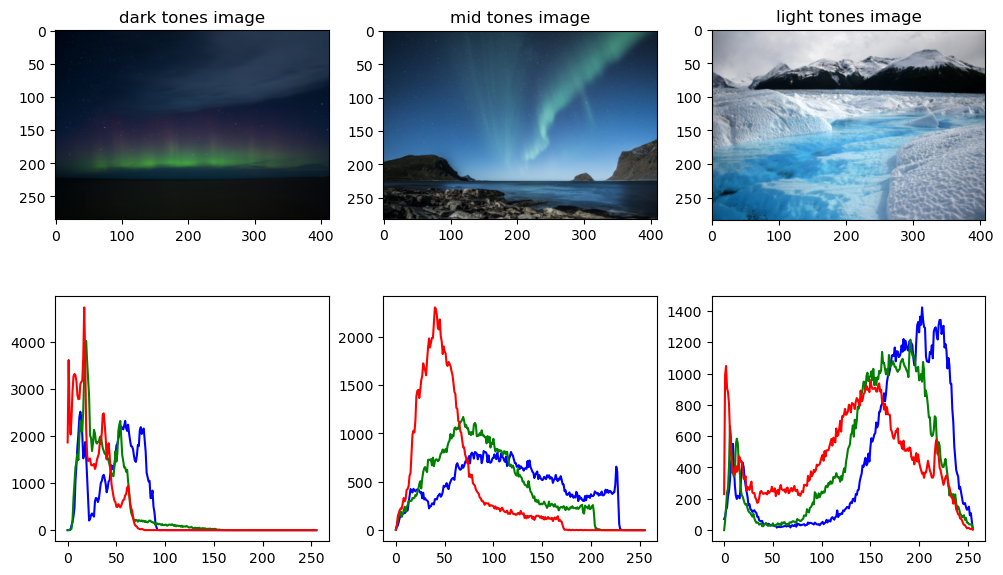

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# read images
dark_tones = cv2.imread('images/dark.png')
mid_tones = cv2.imread('images/mid.png')
light_tones = cv2.imread('images/light.png')

#plot imagea
plt.figure(figsize=[12,7])
plt.subplot(231);plt.imshow(dark_tones[...,::-1]);plt.title("dark tones image");
plt.subplot(232);plt.imshow(mid_tones[...,::-1]);plt.title("mid tones image");
plt.subplot(233);plt.imshow(light_tones[...,::-1]);plt.title("light tones image");

color = ('b', 'g', 'r')
#dark tones histogram
plt.subplot(234);
for i, col in enumerate(color):
    histogram = cv2.calcHist([dark_tones], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)
    
#mid tones histogram
plt.subplot(235);
for i, col in enumerate(color):
    histogram = cv2.calcHist([mid_tones], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)
    
#light tones histogram
plt.subplot(236);
for i, col in enumerate(color):
    histogram = cv2.calcHist([light_tones], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

### Dominate colors by histogram

In [21]:
def hsv_histogram(image_path):
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hue_hist = cv2.calcHist([hsv], [0], None, [180], [0, 180])


    plt.figure(figsize=[10,3]);
    plt.subplot(121);plt.imshow(image[...,::-1]);plt.xticks([]);plt.yticks([]);
    plt.subplot(222);plt.plot(hue_hist, color='red');plt.xticks([]);plt.yticks([]);
    plt.subplot(224);plt.imshow(final_bgr_spectrum[...,::-1]);plt.xticks([]);plt.yticks([]);

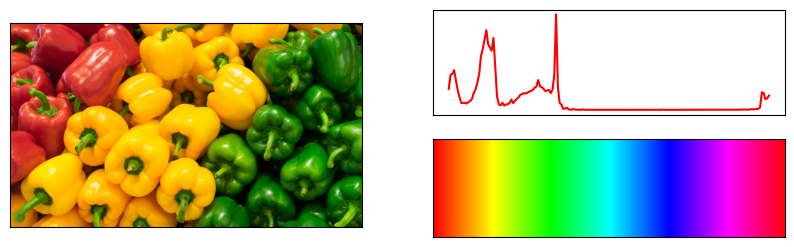

In [22]:
hsv_histogram('images/felfel-dolme.jpg')

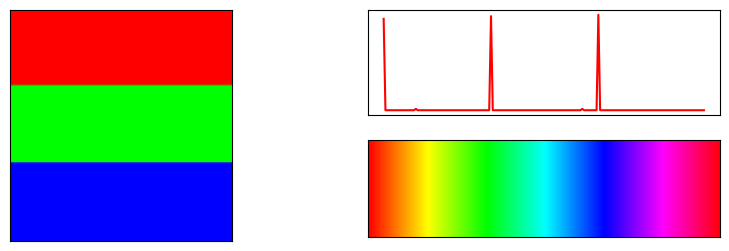

In [23]:
hsv_histogram('images/color.png')

### Histogram equalization

Text(0.5, 1.0, 'equalized histogram')

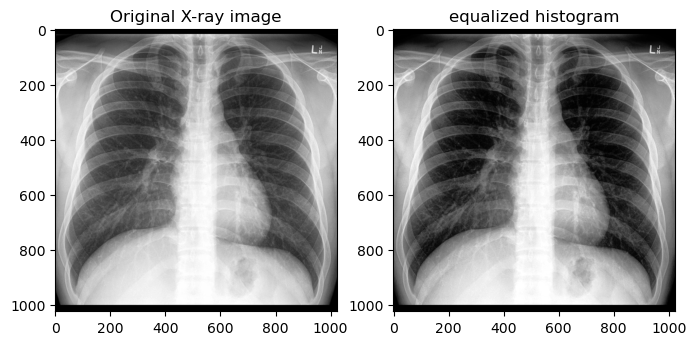

In [24]:
image = cv2.imread('images/xray.jpg', 0)
result = cv2.equalizeHist(image)

plt.figure(figsize=[8,4])
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original X-ray image");
plt.subplot(122);plt.imshow(result, cmap='gray');plt.title("equalized histogram")

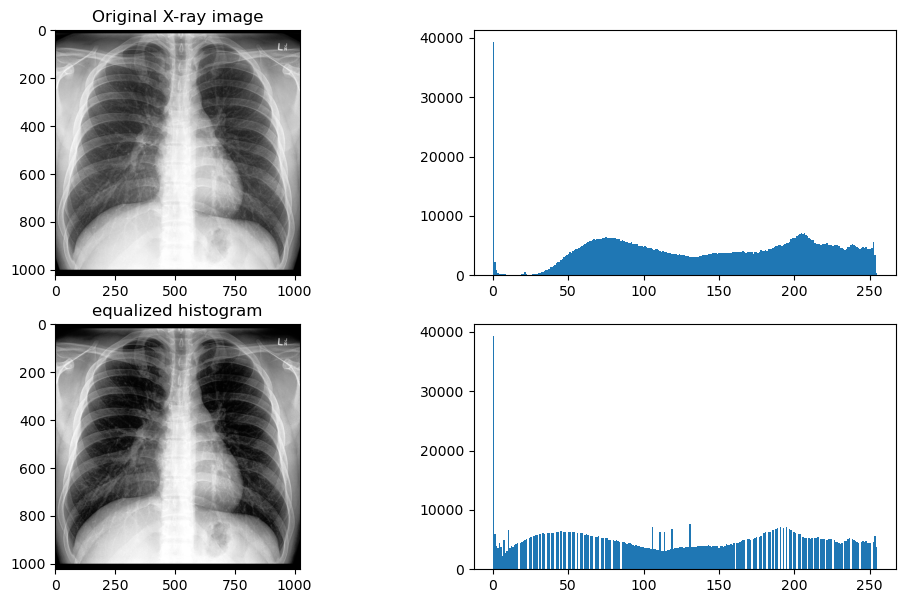

In [25]:
image = cv2.imread('images/xray.jpg', 0)
result = cv2.equalizeHist(image)

plt.figure(figsize=[12,7])
plt.subplot(221);plt.imshow(image, cmap='gray');plt.title("Original X-ray image");
plt.subplot(222);plt.hist(image.ravel(), 256);

plt.subplot(223);plt.imshow(result, cmap='gray');plt.title("equalized histogram");
plt.subplot(224);plt.hist(result.ravel(), 256);

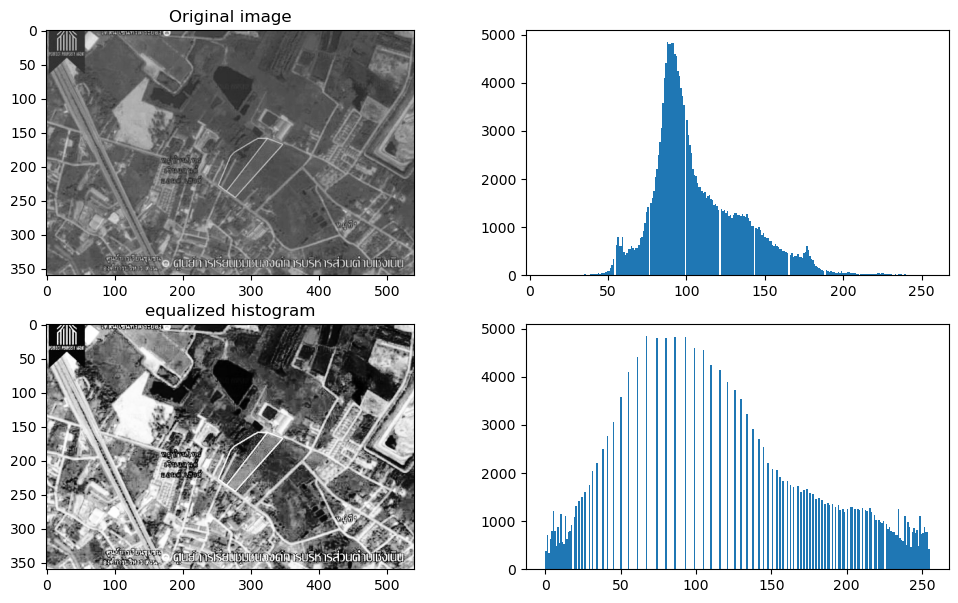

In [26]:
image = cv2.imread('images/satellite.jpg', 0)
result = cv2.equalizeHist(image)

plt.figure(figsize=[12,7])
plt.subplot(221);plt.imshow(image, cmap='gray');plt.title("Original image");
plt.subplot(222);plt.hist(image.ravel(), 256);

plt.subplot(223);plt.imshow(result, cmap='gray');plt.title("equalized histogram");
plt.subplot(224);plt.hist(result.ravel(), 256);

### Histogram equalization

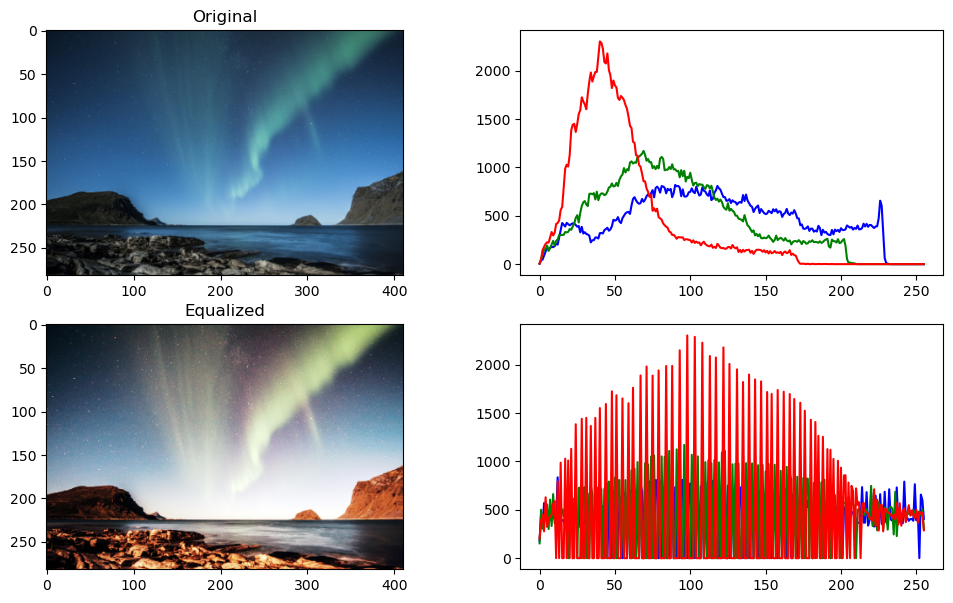

In [27]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/mid.png')
###############
# Histogram Equalization
channels = cv2.split(image)
eq_channels = []
for ch in channels:
    eq_channels.append(cv2.equalizeHist(ch))
eq_image = cv2.merge(eq_channels)


#plot images
plt.figure(figsize=[12,7])
plt.subplot(221);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(223);plt.imshow(eq_image[...,::-1]);plt.title("Equalized");


color = ('b', 'g', 'r')
#Original image histogram
plt.subplot(222);
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)
    
#Equualized image histogram
plt.subplot(224);
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

### Adaptive histogram equalization

####  CLAHE (Contrast Limited Adaptive Histogram Equalization)

### before CLAHE

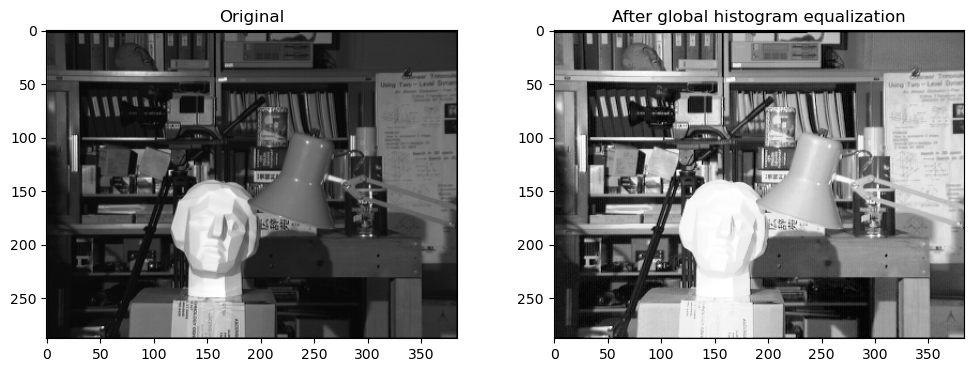

In [28]:
image = cv2.imread('images/statue.png', 0)
result = cv2.equalizeHist(image)

plt.figure(figsize=[12,4])
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(result, cmap='gray');plt.title("After global histogram equalization");

### After CLAHE

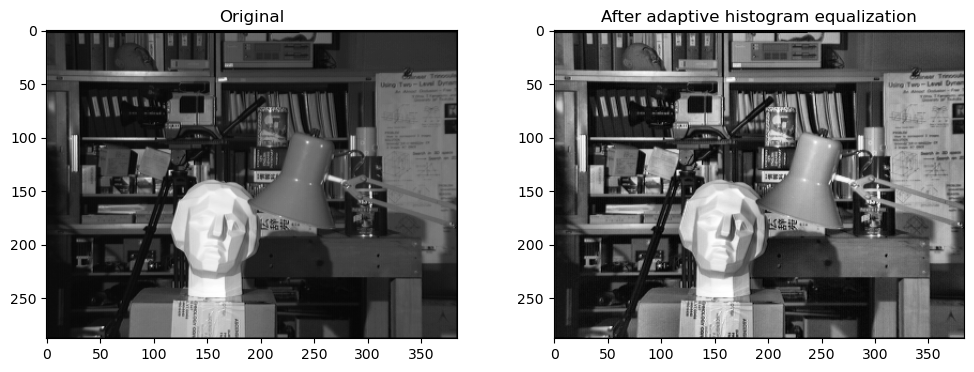

In [29]:
image = cv2.imread('images/statue.png', 0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
result = clahe.apply(image)

plt.figure(figsize=[12,4])
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(result, cmap='gray');plt.title("After adaptive histogram equalization");

### CLAHE on color image

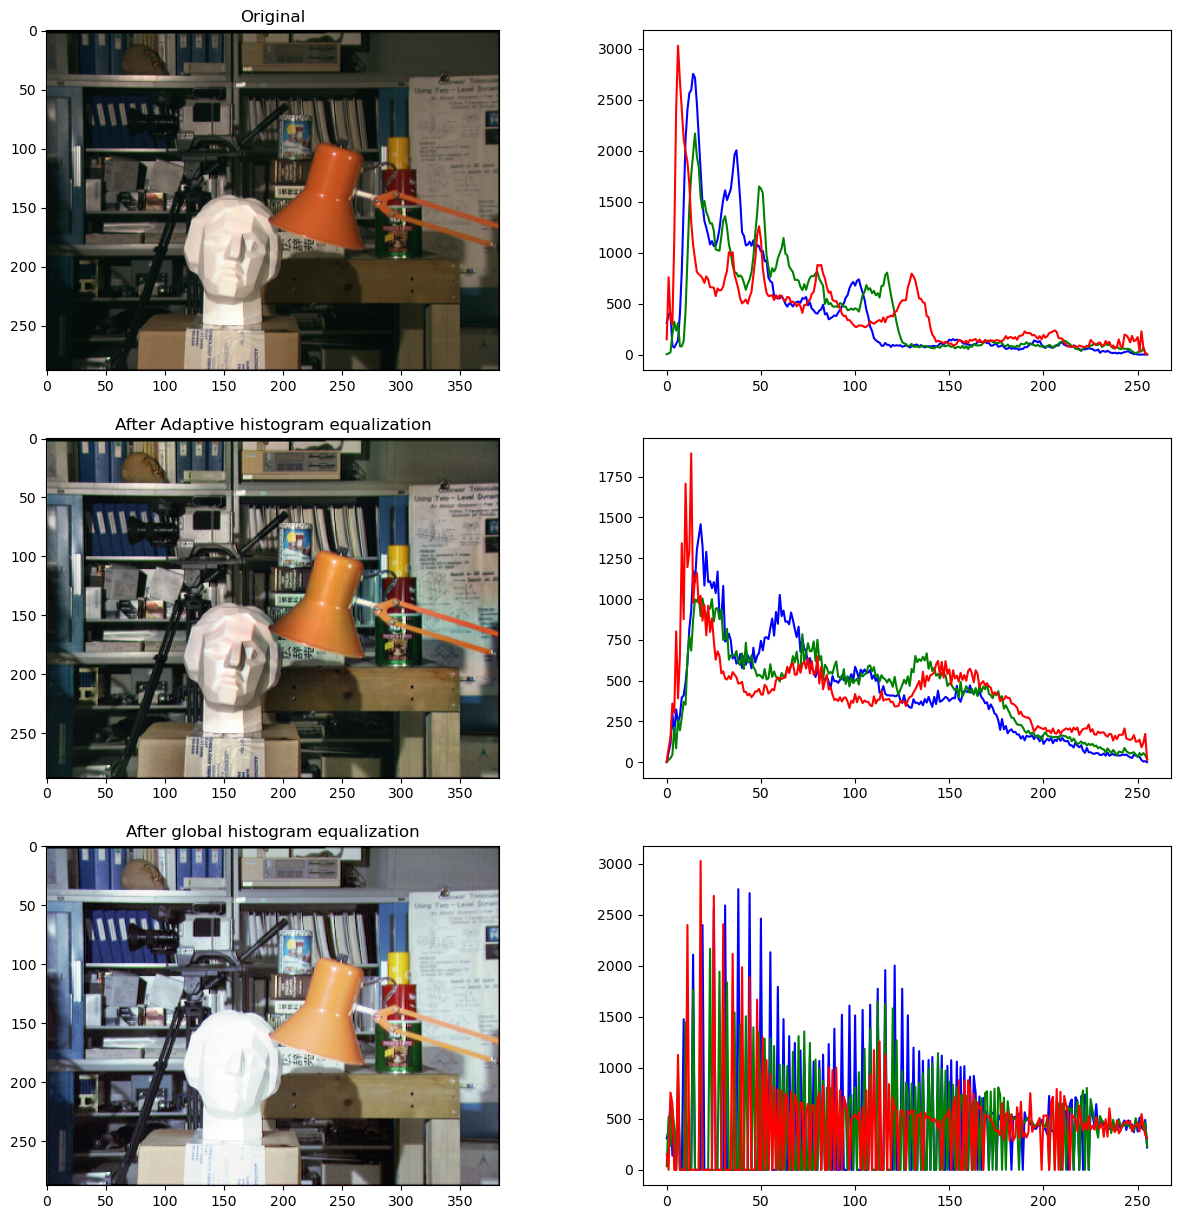

In [30]:
image = cv2.imread('images/statue.png')

# Histogram Equalization
channels = cv2.split(image)

#Adaptive method(CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
eq_channels = []
for ch in channels:
    eq_channels.append(clahe.apply(ch))
eq_clahe_image = cv2.merge(eq_channels)

#Global method
eq_channels = []
for ch in channels:
    eq_channels.append(cv2.equalizeHist(ch))
eq_image = cv2.merge(eq_channels)

#plot images
plt.figure(figsize=[15,15])
plt.subplot(321);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(323);plt.imshow(eq_clahe_image[...,::-1]);plt.title("After Adaptive histogram equalization");
plt.subplot(325);plt.imshow(eq_image[...,::-1]);plt.title("After global histogram equalization");


color = ('b', 'g', 'r')
#Original image histogram
plt.subplot(322);
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

#Equualized image histogram with Adaptive method
plt.subplot(324);
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_clahe_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)
    
#Equualized image histogram with Global method
plt.subplot(326);
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)